In [1]:
from google.colab import files;
from IPython.display import Image;

In [2]:
uploaded=files.upload();

Saving obj1.png to obj1.png
Saving obj2.png to obj2.png
Saving obj3.png to obj3.png


Enter the number of images you want to insert : 3
Enter image 1 path with extension
obj2.png


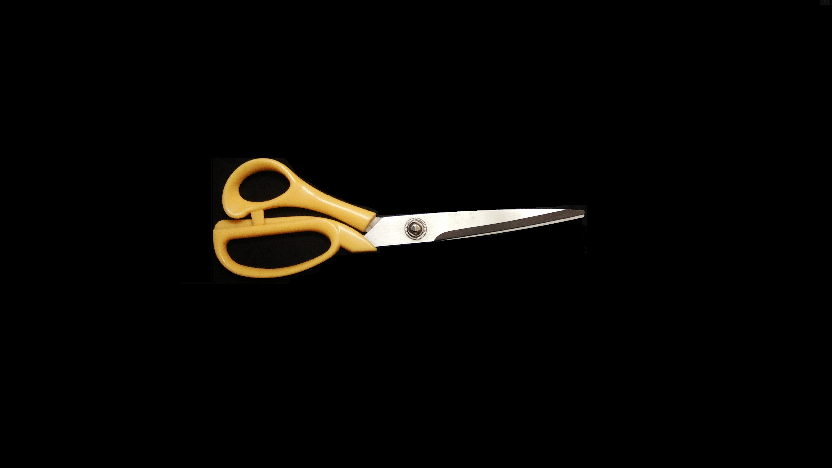

Enter image 2 path with extension
obj1.png


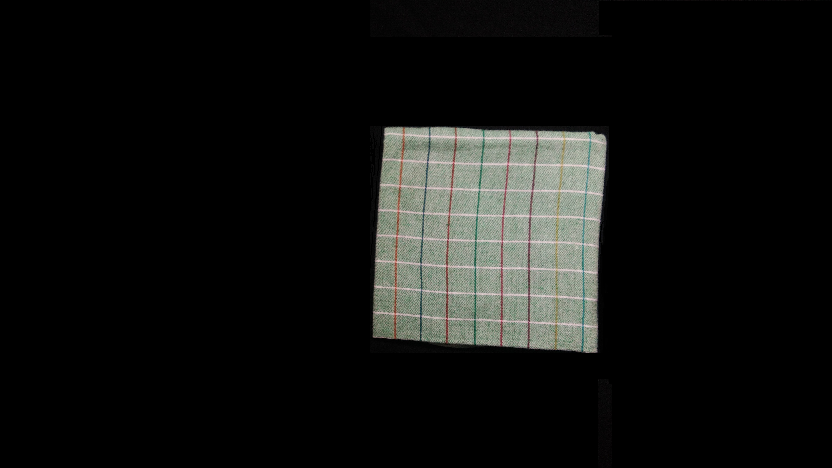

Enter image 3 path with extension
obj3.png


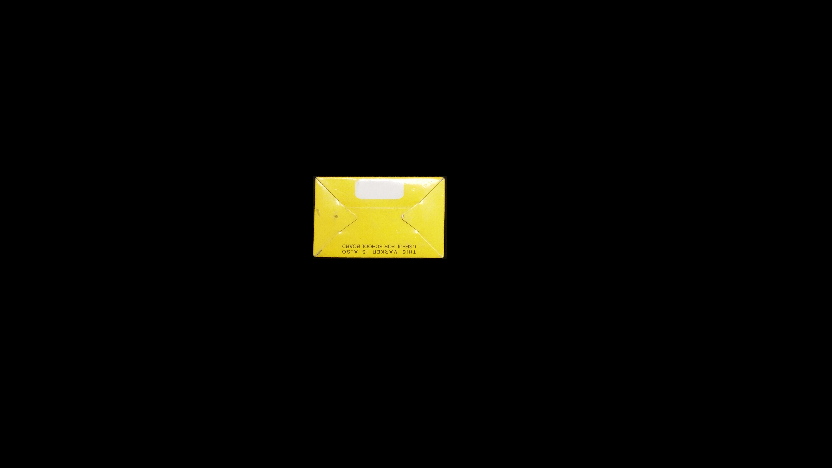

Images have been sorted and time taken for sorting is 0.154374 seconds.
obj3.png. It's size= 500985 bytes
obj2.png. It's size= 905224 bytes
obj1.png. It's size= 2927842 bytes


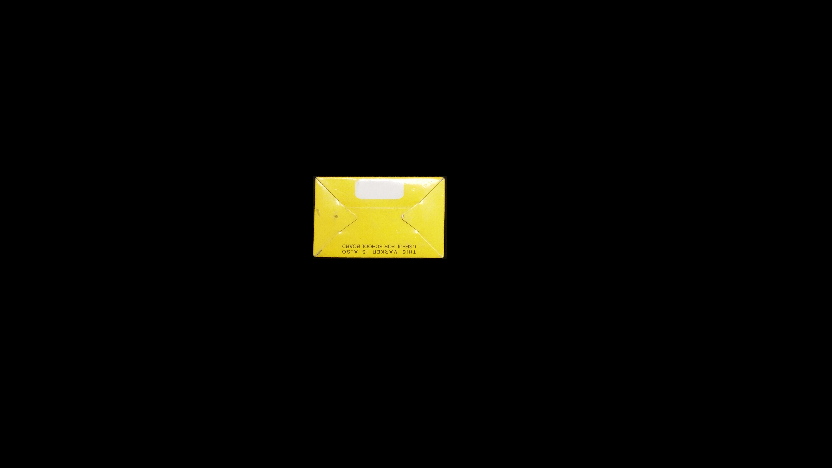

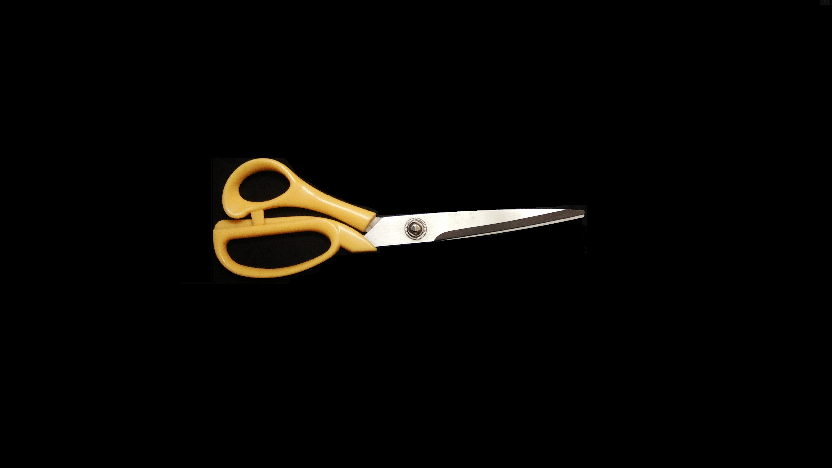

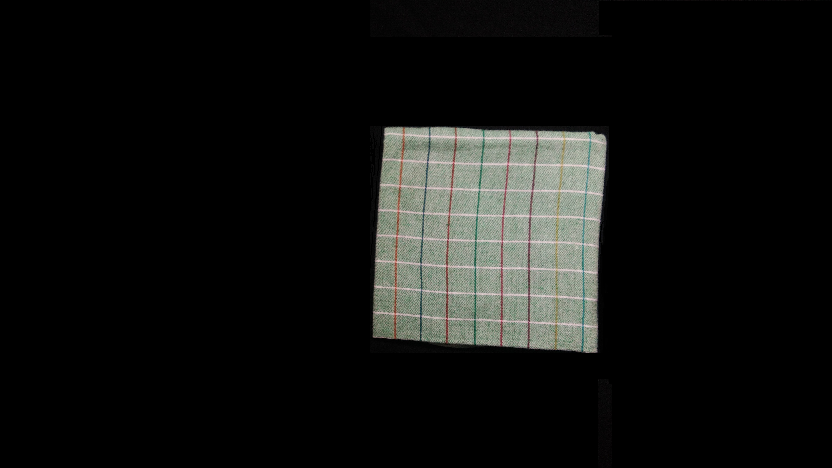

All the images have been sorted based on thier size in increasing order.
Enter the path of the image you want to search :obj2.png
The image is found. Time taken for searching is 0.083381 seconds


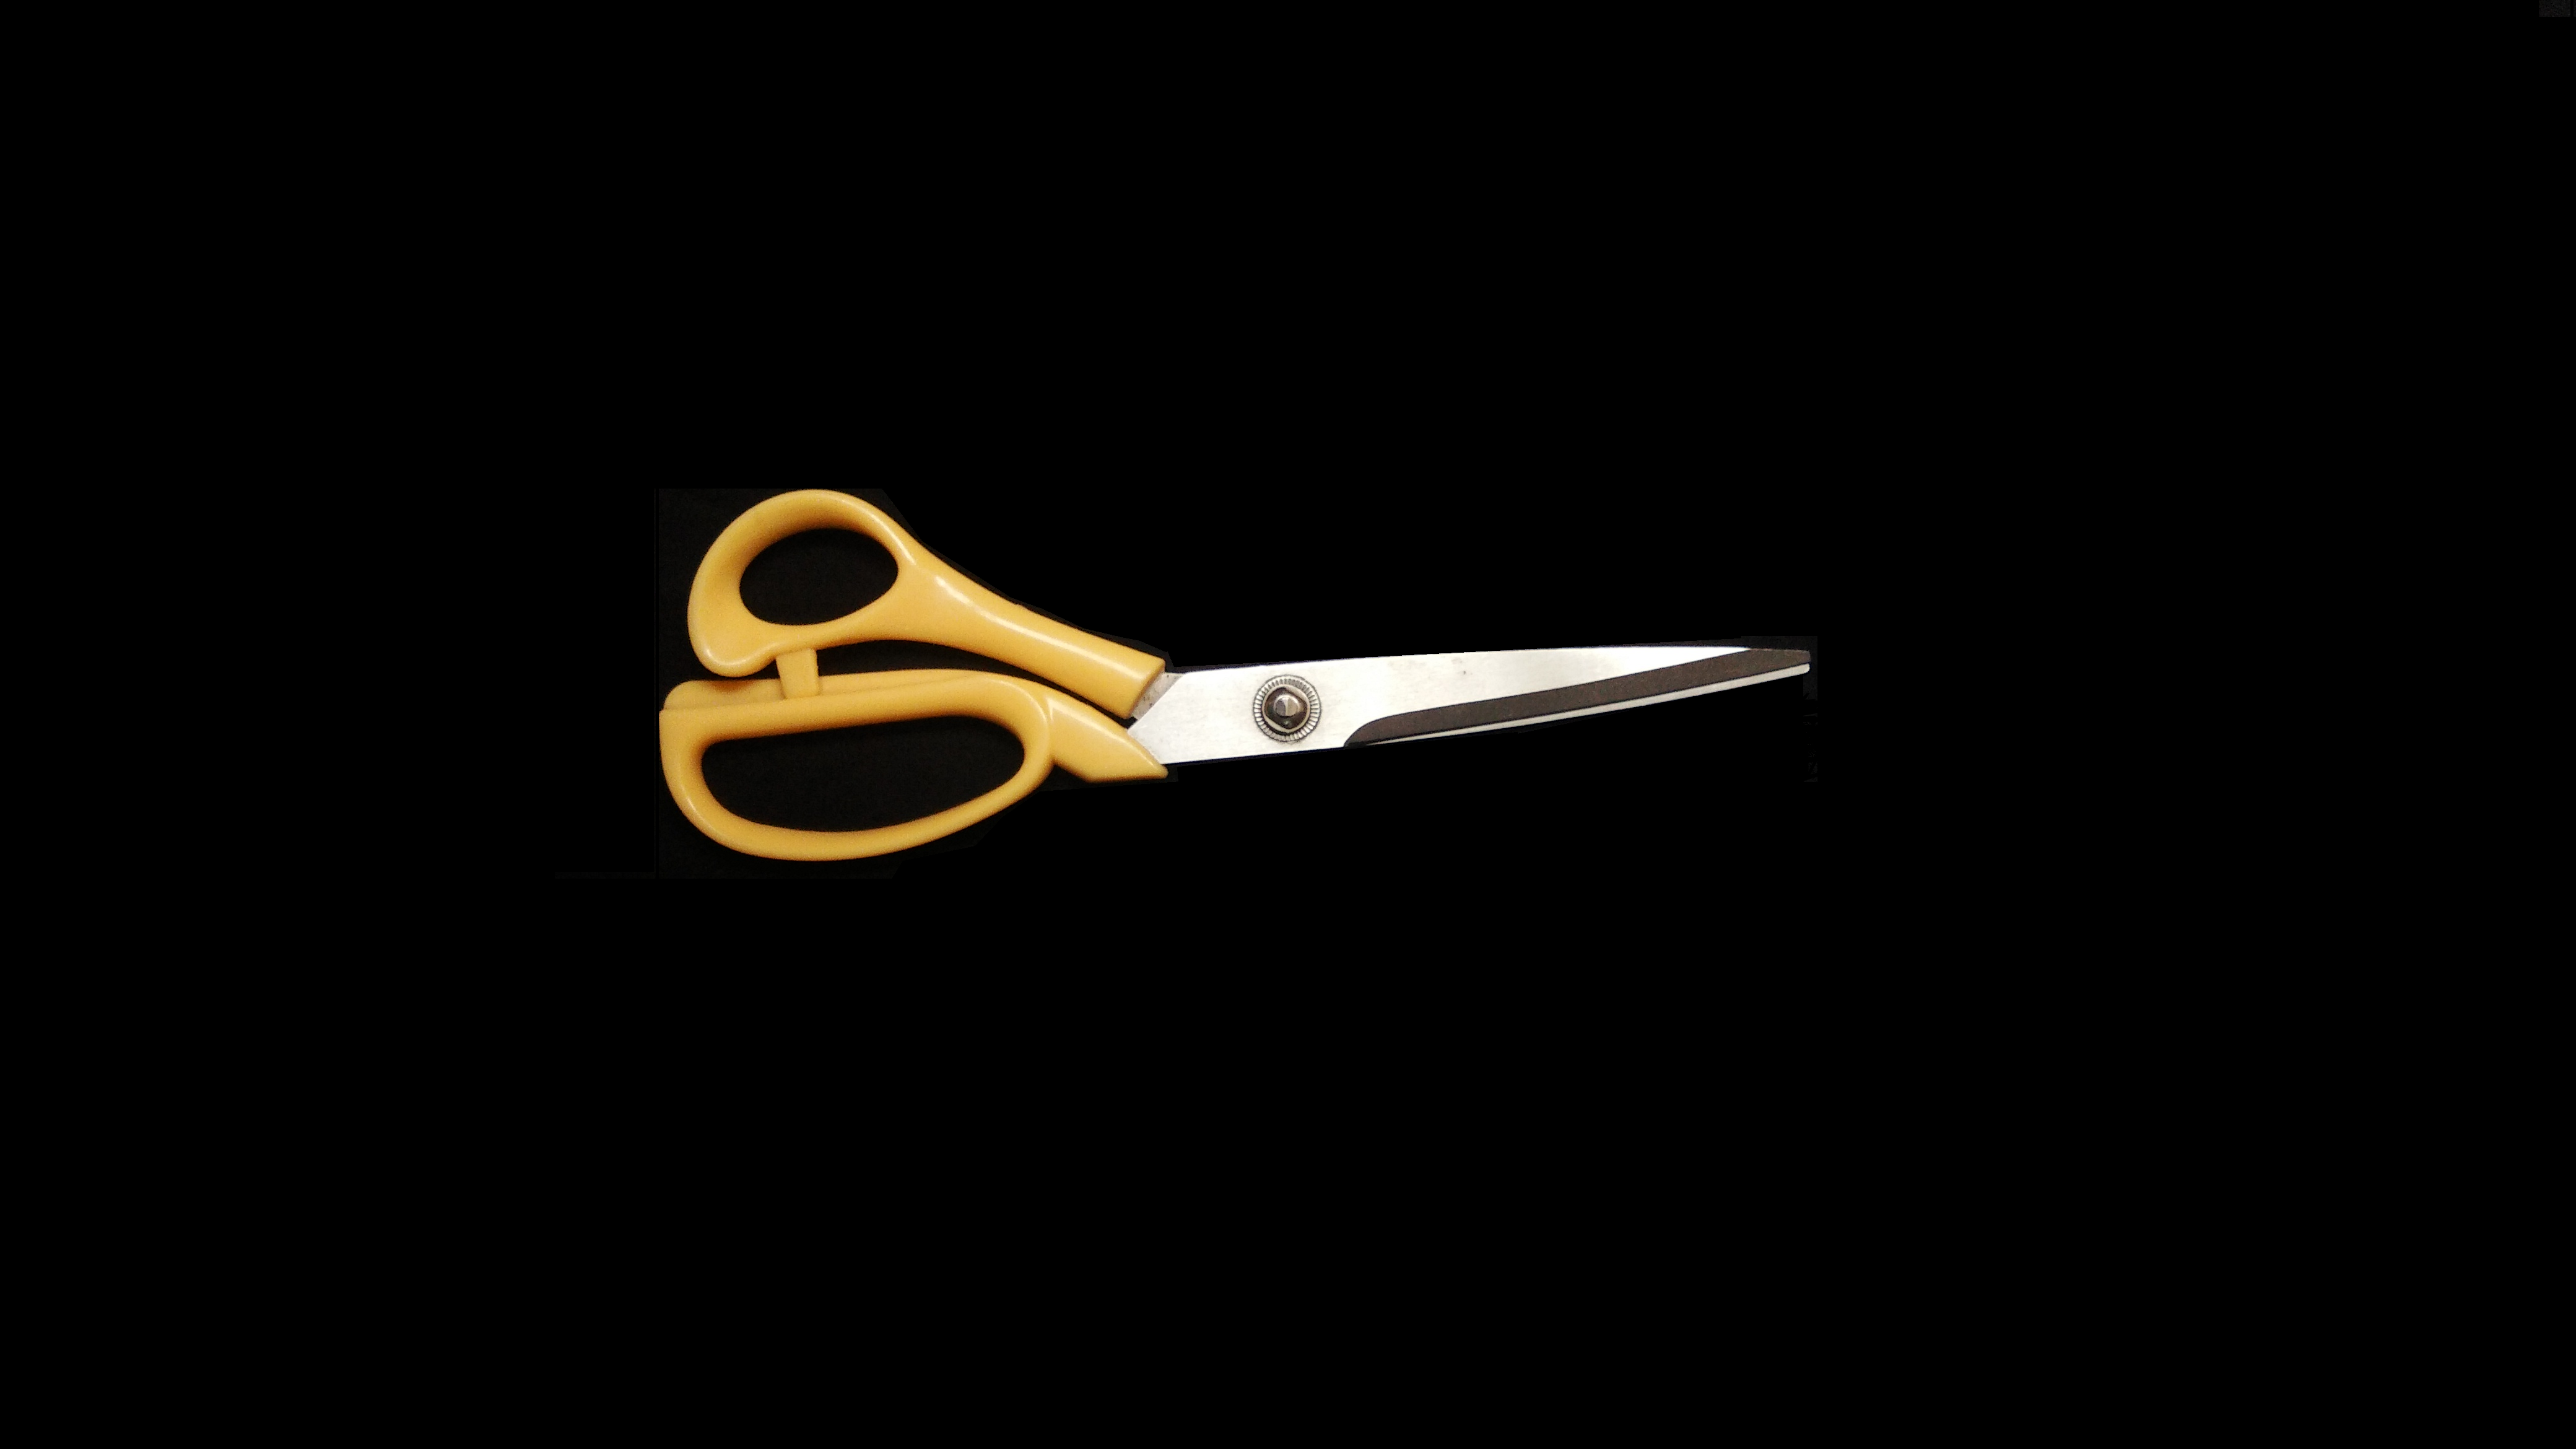

In [7]:
import os;
import cv2;
from google.colab.patches import cv2_imshow;
import time;
 
def inp_1(n):
  f=[];
  for i in range(n):
    j=i+1;
    print("Enter image %d path with extension" %(j));
    p=input('');
    img=cv2.imread(p);    # reads image matrix(list) into img
    s=os.stat(p).st_size; # calculates img size in bytes
    f.append([img,s,p]);  # appends [img,size,path] into f
    w = int(img.shape[1] * 20/ 100);
    h = int(img.shape[0] * 20/ 100);
    cv2_imshow(cv2.resize(img,(w,h)));  # preview of the entered img(smaller size)
  return(f);
 
def partition(arr, low, high):
   i = (low-1);
   b, g, r=cv2.split(arr[high][0]);
   v1=cv2.countNonZero(b); # Number of occupied blue pixels
   v2=cv2.countNonZero(g); # Number of occupied green pixels
   v3=cv2.countNonZero(r); # Number of occupied red pixels
   V=[v1, v2, v3];
   pivot=max(V) # Total number pixels occupied by the object
   for j in range(low, high):
       b, g, r=cv2.split(arr[j][0]);
       v4=cv2.countNonZero(b); # Number of occupied blue pixels
       v5=cv2.countNonZero(g); # Number of occupied green pixels
       v6=cv2.countNonZero(r); # Number of occupied red pixels
       V1=[v4, v5, v6];
       t=max(V1) # Total number pixels occupied by the object
       if t <= pivot: 
           i = i+1;
           arr[i], arr[j] = arr[j], arr[i];
   arr[i+1], arr[high] = arr[high], arr[i+1];
   return (i+1);
 
def quickSort(arr, low, high):
   if len(arr) == 1:
       return arr;
   if low < high:
       pi = partition(arr, low, high);
       quickSort(arr, low, pi-1);
       quickSort(arr, pi+1, high);
# Time complexity of quick sort is log2(n)... (where n is len(arr)).
 
def linearsearch(arr, x):
  for i in range(len(arr)):
    if (len(arr[i][0]))==(len(x)):    # check if both have same hieght
      if (len(arr[i][0][0]))==(len(x[0])):  # check if both have same width
        difference = cv2.subtract(arr[i][0], x); #O(1)*O(n)
        b, g, r = cv2.split(difference); # O(1)*O(n)
        if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
          return (i); # O(1)*O(n)
  return (-1);
#Time complexity of the search is O(n)

def main():
  t="Enter the number of images you want to insert : ";
  n=int(input(t));
  I=inp_1(n);
  st1=time.time();
  quickSort(I,0,n-1);
  et1=time.time();
  print("Images have been sorted and time taken for sorting is %f seconds." %(et1-st1));
  for i in range(n):
    print(I[i][2]+". It's size= %d bytes" %(I[i][1]));
  for i in range(n):
    w = int(I[i][0].shape[1] * 20/ 100);
    h = int(I[i][0].shape[0] * 20/ 100);
    cv2_imshow(cv2.resize(I[i][0],(w,h)));
  print("All the images have been sorted based on thier size in increasing order.");
  t1="Enter the path of the image you want to search :";
  k=input(t1);
  x=cv2.imread(k);
  st2=time.time();
  N=linearsearch(I,x);
  et2=time.time();
  if N==-1:
    print("Could not find the image");
  else:
    print("The image is found. Time taken for searching is %f seconds" %(et2-st2));
    cv2_imshow(I[N][0]);
 
if __name__ == "__main__":
    main();